In [1]:
from sklearn.datasets import fetch_mldata
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib

<h3>Loading MNIST </h3>

In [2]:
mnist = fetch_mldata('MNIST original')

In [3]:
mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([0., 0., 0., ..., 9., 9., 9.])}

In [4]:
X, y = mnist['data'] , mnist['target']

In [45]:
X.shape

(70000, 784)

In [6]:
y.shape

(70000,)

(-0.5, 27.5, 27.5, -0.5)

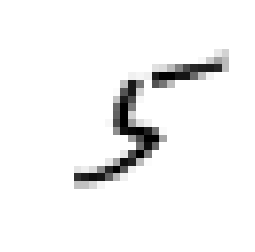

In [7]:
%matplotlib inline
plt.figure()
plt.imshow(X[35000].reshape((28,28)), cmap = matplotlib.cm.binary, interpolation='nearest')
plt.axis("off")

In [9]:
y[35000]

5.0

In [10]:
#MNIST data set is already splitted in to test and train first 60000 are train and last 10000 are test
X_train, X_test, y_train, y_test = X[:60000,:], X[60000:,:], y[:60000], y[60000:]

In [11]:
#As target output is sorted,
#In Machine Learning it is always good to shuffle data

In [12]:
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index,:], y_train[shuffle_index]

<h3>Taking For Subset of Data For Easiness</h3>

<h4> Building Training Data </h4>

In [65]:
np.bincount(np.array(y_train, dtype='int64'))/y_train.shape[0] * 100

array([ 9.87166667, 11.23666667,  9.93      , 10.21833333,  9.73666667,
        9.035     ,  9.86333333, 10.44166667,  9.75166667,  9.915     ])

In [66]:
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.05)
for train_index, test_index in sss.split(X_train, y_train):
    print(train_index.shape)
    print(test_index.shape)
    strt_X_train = X_train[test_index,:]
    strt_y_train= y_train[test_index]

(57000,)
(3000,)


In [67]:
np.bincount(np.array(strt_y_train, dtype='int64'))/strt_y_train.shape[0] * 100

array([ 9.86666667, 11.23333333,  9.93333333, 10.23333333,  9.73333333,
        9.03333333,  9.86666667, 10.43333333,  9.76666667,  9.9       ])

In [68]:
strt_y_train.shape

(3000,)

<h4>Building Testing Data </h4>

In [69]:
np.bincount(np.array(y_test, dtype='int64'))/y_test.shape[0] * 100

array([ 9.8 , 11.35, 10.32, 10.1 ,  9.82,  8.92,  9.58, 10.28,  9.74,
       10.09])

In [70]:
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.05)
for train_index, test_index in sss.split(X_test, y_test):
    print(train_index.shape)
    print(test_index.shape)
    strt_X_test = X_test[test_index,:]
    strt_y_test= y_test[test_index]

(9500,)
(500,)


In [71]:
np.bincount(np.array(strt_y_test, dtype='int64'))/strt_y_test.shape[0] * 100

array([ 9.8, 11.4, 10.4, 10. ,  9.8,  9. ,  9.6, 10.2,  9.8, 10. ])

In [72]:
strt_y_test.shape

(500,)

<h3> Binary Classiefier </h3>

Instead of classifiying digits, first we will classify whether a digit is 5 or not

In [73]:
strt_y_train_5 = (strt_y_train == 5)
strt_y_test_5 = (strt_y_test == 5)

In [74]:
# Here we will stochastic Gradient Descent Algorithm(SGD) classifier

In [75]:
from sklearn.linear_model.stochastic_gradient import SGDClassifier
sgd_clf = SGDClassifier(random_state = 5, max_iter=1000)
sgd_clf.fit(strt_X_train, strt_y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=1000, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=5, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [76]:
sgd_clf.predict([X[35000]])

array([ True])

<h3>Taking Subset of Data</h3>

In [77]:
np.bincount(strt_y_train_5)

array([2729,  271], dtype=int64)

In [78]:
vikram='''
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=10, random_state=10, shuffle=True)
for train_index,test_index in skf.split(X_train, y_train):
    #print("one")
    #print(len(train_index))
    #print(len(test_index))
    all_index = np.append(train_index, test_index)
    strt_X_train = X_train[all_index,:]
    strt_y_train = y_train[all_index]
'''

In [80]:
np.bincount(np.array(strt_y_train, dtype='int64'))/strt_y_train.shape[0] * 100

array([ 9.86666667, 11.23333333,  9.93333333, 10.23333333,  9.73333333,
        9.03333333,  9.86666667, 10.43333333,  9.76666667,  9.9       ])

<h3>Performance Measures</h3>
<ol>
    <li><b>Accuracy</b></li>
    <li><b>Precision</b></li>
    <li><b>Recall</b></li>
    <li><b>F1-Score</b></li>
</ol>

<ul>
<li><b>Accuracy works well on balanced data.</b></li>
<li><b>There is a precision recall tradeoff, where there is more precision, there is less recall, when there is less precision, there is more recall</b></li>
<li><b>F1 score is harmonic mean of precision and recall</b></li>
</ul>

<h4> Measuring Accuracy Using Cross-Validation </h4>

In [82]:
strt_y_train_5.shape

(3000,)

In [96]:
from sklearn.model_selection import cross_val_score
sgd_clf = SGDClassifier(random_state = 5, max_iter=1000)
cross_val_score(sgd_clf, strt_X_train, strt_y_train_5, cv=3, scoring='accuracy')

array([0.92807193, 0.949     , 0.94594595])

In [97]:
from sklearn.model_selection import cross_val_predict
sgd_clf = SGDClassifier(random_state = 5, max_iter=1000)
y_predict_cross = cross_val_predict(sgd_clf, strt_X_train, strt_y_train_5, cv=3)

<b>Got pretty good accuracy</b>

<b> Never5 classifier, it always its not 5 </b>

In [98]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def __init__(self):
        pass
    def fit(self, X, y):
        return self
    def predict(self, X):
        return np.zeros(X.shape[0], dtype=bool)

In [102]:
nv5Clf = Never5Classifier()
from sklearn.model_selection import cross_val_score
print( cross_val_score(nv5Clf, strt_X_train, strt_y_train_5, cv=3, scoring='accuracy') )
nv5Clf = Never5Classifier()
y_predict_cross_never = cross_val_predict(nv5Clf, strt_X_train, strt_y_train_5, cv=3)

[0.92  0.904 0.905]


<b>We got bit less accuracy than, SGD classifier</b>

<h4>Confusion Matrix</h4>

In [108]:
from sklearn.metrics import confusion_matrix
# Always parameters should be true, prediction
confusion_matrix(strt_y_train_5,y_predict_cross)

array([[2627,  102],
       [  75,  196]], dtype=int64)

In [106]:
confusion_matrix(strt_y_train_5, y_predict_cross_never)

array([[2729,    0],
       [ 271,    0]], dtype=int64)

<h4> Precision and Recall and F1Score</h4>

In [ ]:
from sklearn.metrics import precision_score, recall_score
print("SGD Precision:-> %.2f"%precision_score(strt_y_train_5,y_predict_cross))
print("Never5 Precision:-> %.2f(zero because 0/0 issue)"%precision_score(strt_y_train_5, y_predict_cross_never))
#Here Precision supposed to be 1 because 0/0 issue they set it to Zero

In [114]:
from sklearn.metrics import precision_score, recall_score
print("SGD Recall:-> %.2f"%recall_score(strt_y_train_5,y_predict_cross))
print("Never5 Recall:-> %.2f"%recall_score(strt_y_train_5, y_predict_cross_never))

SGD Recall:-> 0.72
Never5 Recall:-> 0.00


In [119]:
from sklearn.metrics import f1_score
print("SGD Recall:->%.2f"%f1_score(strt_y_train_5, y_predict_cross))
print("Never5 Recall:->%.2f(Zero because 0/0 issue)"%f1_score(strt_y_train_5, y_predict_cross_never))

SGD Recall:->0.69
Never5 Recall:->0.00(Zero because 0/0 issue)


C:\Users\vikra\AppData\Local\Continuum\anaconda3\envs\vikramthesis\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


We cannot have higher precision and higher recall, because Precision & Recall Tradeoff

In [122]:
y_scores = cross_val_predict(sgd_clf, strt_X_train, strt_y_train_5, cv=3, method="decision_function")

In [124]:
from sklearn.metrics import precision_recall_curve
precision, recall, threshold = precision_recall_curve(strt_y_train_5, y_scores)

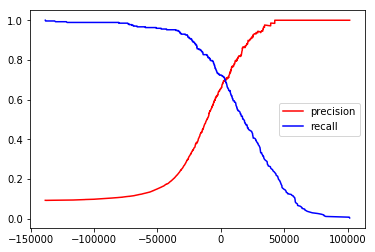

In [129]:
plt.figure()
plt.plot(threshold, precision[:-1], color='r', label="precision")
plt.plot(threshold, recall[:-1], color='b', label="recall")
plt.legend()
plt.show()


Text(0,0.5,'precision')

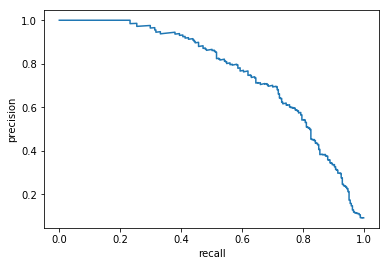

In [131]:
plt.figure()
plt.plot(recall, precision)
plt.xlabel("recall")
plt.ylabel("precision")

<h5>Lets increase Precision </h5>

In [134]:
y_pred_90 = y_scores > 70000

In [135]:
precision_score(strt_y_train_5, y_pred_90)

1.0

<h5>If some asks to increase precision, you should ask them at what recall</h5>

<h3> The ROC Curve </h3>

<b>For Now we will skip this </b>

<h3>Multiclass Classification</h3>

<h5>Direct Mutlinomial Classifiers</h5>
<ol>
 <li>Naive Bayes Classifiers</li>
 <li>Random Forest Classifiers</li>
</ol>
<h5>Strict Binary Classifier</h5>
<ol>
    <li>SVM</li>
    <li>Linear Classifiers</li>
</ol>
But there are various strategies, to achieve Mutinomial Classifier, using Binary Classifiers

<h5>Strategies to Aheive Multinomail Classification using Binary Classifier </h5>
<ol>
    <li><b>One Vs All: </b>In this classifier you will train N classifier where in N is number of classes you have, for each class you will train whether it is that particular class or not, based on decision scores, you will take classe which highest decision score</li>
    <li><b>One Vs One: </b>In this classifier you will train N(N-1)/2 classifiers, that is classifier for each pair, while determining for a particular class you will ask all classes to which it class it belongs to and you will take majority one</li>
</ol>

<h6>One vs All has data imbalance problem, but there are some strategies to fix this problem</h6>
<h6>Advantage of One vs One is thought you are training N(N-1)/2, but size of training data for each classifier is very less(100/N percentage)

<h6>All linear classifier in ScikitLearn (SGD) use one Vs All approach, but SVC uses (One Vs One) approach because SVC is slow with big datasets</h6> 

But you can explicity set make any linear classifier in to that either of approach using <b>OneVsOneClassifier</b> and <b>OneVsRestClassifier</b> 

In [141]:
#Lets see how SGD uses One Vs All in internal implementation
sgd_clf.fit(strt_X_train, strt_y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=1000, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=5, shuffle=True,
       tol=None, verbose=0, warm_start=False)

(-0.5, 27.5, 27.5, -0.5)

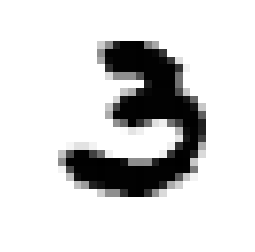

In [142]:
%matplotlib inline
plt.figure()
plt.imshow(strt_X_train[1000].reshape((28,28)), cmap = matplotlib.cm.binary, interpolation='nearest')
plt.axis("off")

In [144]:
sgd_clf.predict([strt_X_train[1000]])
#cool it works, well

array([3.])

In [146]:
some_digit_scores = sgd_clf.decision_function([strt_X_train[1000]])

In [155]:

print("Length is %d"%some_digit_scores.shape[1])
some_digit_scores
# After seeing above result we can say it used One Vs All classifiers

Length is 10


array([[ -18281.55727396,  -35724.69409057,  -22396.45414626,
          17512.24549054, -153596.98665552,  -61646.97775465,
         -96347.86683284,  -95012.27273966, -165561.82645283,
        -228560.41742754]])

In [158]:
index = np.argmax(some_digit_scores)
print("%d"%index)

3


In [160]:
sgd_clf.classes_

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [161]:
sgd_clf.classes_[index]

3.0

In [166]:
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42, max_iter=1000))
ovo_clf.fit(strt_X_train, strt_y_train)

OneVsOneClassifier(estimator=SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=1000, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False),
          n_jobs=1)

In [167]:
ovo_clf.predict([strt_X_train[1000]])

array([3.])

In [168]:
ovo_clf.classes_

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [171]:
print("Total Number of Classifier it trained is %d"%len(ovo_clf.estimators_))


Total Number of Classifier it trained is 45


In [172]:
ovo_clf.estimators_
# it trained 45 different classes

(SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
        eta0=0.0, fit_intercept=True, l1_ratio=0.15,
        learning_rate='optimal', loss='hinge', max_iter=1000, n_iter=None,
        n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
        tol=None, verbose=0, warm_start=False),
 SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
        eta0=0.0, fit_intercept=True, l1_ratio=0.15,
        learning_rate='optimal', loss='hinge', max_iter=1000, n_iter=None,
        n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
        tol=None, verbose=0, warm_start=False),
 SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
        eta0=0.0, fit_intercept=True, l1_ratio=0.15,
        learning_rate='optimal', loss='hinge', max_iter=1000, n_iter=None,
        n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
        tol=None, verbose=0, warm_start=False),
 SGDClassifier(a

In [175]:
ovo_clf.decision_function([strt_X_train[1000]])

array([[ 6.12962217,  4.98067238,  7.19887263,  9.47007588, -0.5       ,
         7.12714837,  2.85344672,  1.88198619,  5.05294671,  0.80522895]])

In [176]:
from sklearn.ensemble import RandomForestClassifier
rndm_clf = RandomForestClassifier()
rndm_clf.fit(strt_X_train, strt_y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [177]:
rndm_clf.predict([strt_X_train[1000]])

array([3.])

In [181]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.88092382, 0.88764438, 0.85592839])

In [178]:
cross_val_score(rndm_clf, strt_X_train, strt_y_train, cv=3)

array([0.85373134, 0.83483483, 0.83534137])

In [179]:
#Got same kind of accuracy as SGD classifier

In [180]:
#random forest classifier has probabilty estimation values
rndm_clf.predict_proba([strt_X_train[1000]])

array([[0.1, 0. , 0. , 0.8, 0. , 0.1, 0. , 0. , 0. , 0. ]])

<h4> Scale Input and try Accuracy </h4>

In [185]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
strt_X_train_scaled = std_scaler.fit_transform(strt_X_train)
cross_val_score(sgd_clf, strt_X_train_scaled, strt_y_train, cv=3, scoring="accuracy")
# There is a little improvement in accuracy

C:\Users\vikra\AppData\Local\Continuum\anaconda3\envs\vikramthesis\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([0.87960199, 0.86886887, 0.8564257 ])

<h3>Error Analysis</h3>

In [186]:
str_y_train_pred = cross_val_predict(sgd_clf, strt_X_train_scaled, strt_y_train, cv=3)
c_matrix = confusion_matrix(strt_y_train, str_y_train_pred)

In [187]:
c_matrix

array([[272,   0,   5,   2,   1,   9,   4,   0,   2,   1],
       [  0, 316,   3,   3,   0,   1,   2,   2,  10,   0],
       [  7,   2, 245,   9,   4,   4,  10,   6,   9,   2],
       [  6,   1,   7, 252,   2,  12,   4,   9,   7,   7],
       [  1,   3,   3,   0, 255,   1,   4,   2,   5,  18],
       [  7,   5,   4,   9,   2, 214,   7,   5,  13,   5],
       [  1,   3,   5,   0,   2,   6, 275,   1,   3,   0],
       [  3,   1,   6,   4,   2,   2,   1, 273,   1,  20],
       [  1,   8,   6,  11,   0,   8,   1,   2, 247,   9],
       [  0,   0,   2,   5,  11,   4,   0,  15,   4, 256]], dtype=int64)

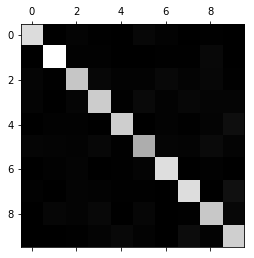

In [188]:
plt.matshow(c_matrix, cmap=plt.cm.gray)
plt.show()

In [191]:
# its hard to analysis error as diagonal values has huge
# lets normalize the matrix and try to analyse error
#As different number of classes are different, so normalization actually helps
norm_conf_matrix = c_matrix / c_matrix.sum(axis = 1, keepdims=True)

In [192]:
# filling diagonal elements as zeros so that we can focus on erros
np.fill_diagonal(norm_conf_matrix,0)

<Figure size 1872x1080 with 0 Axes>

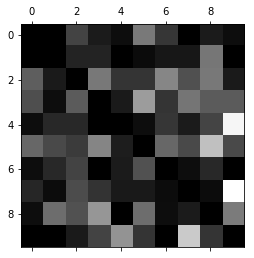

In [199]:
plt.figure(figsize=(26,15))
plt.matshow(norm_conf_matrix, cmap=plt.cm.gray)
plt.show()

In [200]:
#From you can analyse error intensly

In [201]:
#There is very good description in book on error analysis